In [77]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv('../data/data.csv')

In [79]:
def describle_data():
    print('Shape of data:\n', df.shape)
    print('--'*20)
    print('Columns of data: \n', df.columns)
    print('--'*20)
    print('Data types of data: \n', df.dtypes)
    print('--'*20)
    print('Missing values of data: \n', df.isnull().sum())
    print('--'*20)
    print('Describe data: \n', df.describe())
    print('--'*20)
    print('Info data: \n', df.info())
describle_data()

Shape of data:
 (26956, 11)
----------------------------------------
Columns of data: 
 Index(['car_name', 'year', 'price', 'assemble_place', 'series', 'driven kms',
       'num_of_door', 'num_of_seat', 'engine_type', 'transmission', 'url'],
      dtype='object')
----------------------------------------
Data types of data: 
 car_name           object
year               object
price              object
assemble_place     object
series             object
driven kms        float64
num_of_door       float64
num_of_seat       float64
engine_type        object
transmission       object
url                object
dtype: object
----------------------------------------
Missing values of data: 
 car_name          38
year              11
price             11
assemble_place    11
series            11
driven kms        11
num_of_door       11
num_of_seat       11
engine_type       11
transmission      11
url               11
dtype: int64
----------------------------------------
Describe data: 
     

In [80]:
# drop duplicate data have same url
df.drop_duplicates(subset=['url'], inplace=True)
describle_data()

Shape of data:
 (25157, 11)
----------------------------------------
Columns of data: 
 Index(['car_name', 'year', 'price', 'assemble_place', 'series', 'driven kms',
       'num_of_door', 'num_of_seat', 'engine_type', 'transmission', 'url'],
      dtype='object')
----------------------------------------
Data types of data: 
 car_name           object
year               object
price              object
assemble_place     object
series             object
driven kms        float64
num_of_door       float64
num_of_seat       float64
engine_type        object
transmission       object
url                object
dtype: object
----------------------------------------
Missing values of data: 
 car_name          35
year               1
price              1
assemble_place     1
series             1
driven kms         1
num_of_door        1
num_of_seat        1
engine_type        1
transmission       1
url                1
dtype: int64
----------------------------------------
Describe data: 
     

In [81]:
def process_year_colum(year):
    if year.isdigit():
        return int(year)
    else:
        return 0
df['year'] = df['year'].astype(str).apply(process_year_colum)
describle_data()

Shape of data:
 (25157, 11)
----------------------------------------
Columns of data: 
 Index(['car_name', 'year', 'price', 'assemble_place', 'series', 'driven kms',
       'num_of_door', 'num_of_seat', 'engine_type', 'transmission', 'url'],
      dtype='object')
----------------------------------------
Data types of data: 
 car_name           object
year                int64
price              object
assemble_place     object
series             object
driven kms        float64
num_of_door       float64
num_of_seat       float64
engine_type        object
transmission       object
url                object
dtype: object
----------------------------------------
Missing values of data: 
 car_name          35
year               0
price              1
assemble_place     1
series             1
driven kms         1
num_of_door        1
num_of_seat        1
engine_type        1
transmission       1
url                1
dtype: int64
----------------------------------------
Describe data: 
     

In [82]:
def process_price(price):
    try:
        if price.find('Tỷ') != -1:
            ty= price.split('Tỷ')[0]
            trieu = price.split('Tỷ')[1]
            trieu = trieu.split('Triệu')[0]
            return float(ty)*1000000000 + float(trieu)*1000000
        elif price.find('Triệu') != -1:
            trieu = price.split('Triệu')[0]
            trieu = trieu.replace(' ','')
            return float(trieu)*1000000
        else:
            return 0
    except:
        return 0
df['price'] = df['price'].astype(str).apply(process_price)

In [83]:
df['price']=df['price'].apply(lambda x: df['price'].mean() if x == 0 else x)

In [84]:
df['year'].value_counts()
# if year <= 1900 then replace by mean of year
df['year'] = df['year'].apply(lambda x: df['year'].mean() if x <= 1990 else x)


<Axes: title={'center': 'Average car price by Year'}, xlabel='year'>

<Figure size 1000x1000 with 0 Axes>

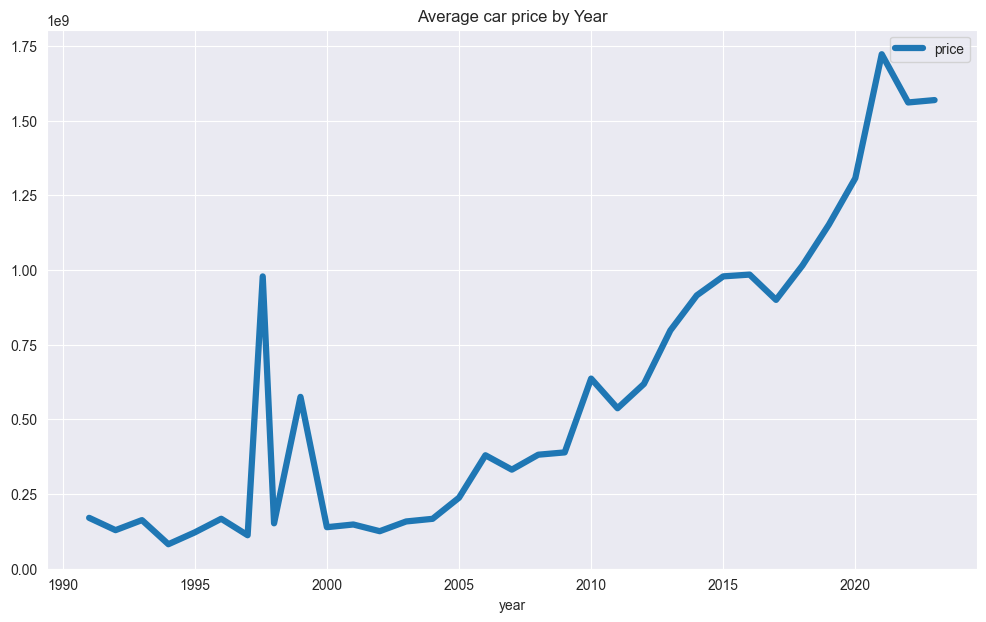

In [85]:
plt.figure(figsize=(10,10))
#plot price by year
pv1=pd.pivot_table(df, index=['year'],values = ['price'],aggfunc = 'mean')
pv1.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by Year')


In [86]:
df['driven kms'].value_counts()
df['driven kms'].describe()

count    2.515600e+04
mean     5.110776e+05
std      3.169618e+07
min      1.000000e+00
25%      2.220425e+04
50%      4.993900e+04
75%      8.000000e+04
max      4.294967e+09
Name: driven kms, dtype: float64

In [87]:
df['driven kms'].isnull().sum()

1